In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df=pd.read_csv('Movie_regression.csv',header=0)

In [20]:
df.head(10)

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400
5,20.5970,59.36,0.542,35718.650,132.2,6.890,7.100,6.885,7.005,7.26,498425,YES,143.48,284.592,Comedy,53,460,57400
6,21.7658,70.74,0.476,33396.660,140.1,7.065,7.265,7.150,7.400,8.96,459241,YES,139.16,243.664,Thriller,41,522,45800
7,22.8910,70.74,0.476,34285.460,169.6,6.980,7.075,6.875,7.170,7.96,400821,NO,116.84,243.536,Drama,56,571,44200
8,24.2248,70.74,0.476,31280.205,173.5,6.910,7.075,6.850,7.000,7.96,295168,YES,118.60,242.640,Comedy,55,564,33000
9,23.4008,70.74,0.476,33352.220,159.4,6.665,6.725,6.575,6.855,7.96,412012,YES,189.56,283.024,Thriller,45,508,37800


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

### Missing Value treatment

In [22]:
df['Time_taken'].mean()

157.39149797570855

In [23]:
df['Time_taken'].fillna(df['Time_taken'].mean(),inplace=True)

In [24]:
df.isnull().sum()

Marketing expense      0
Production expense     0
Multiplex coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
3D_available           0
Time_taken             0
Twitter_hastags        0
Genre                  0
Avg_age_actors         0
Num_multiplex          0
Collection             0
dtype: int64

### Handling Categorical variable by creating dummy variable

we have 2 categorical variables

In [25]:
df.describe(include='O')

,3D_available,Genre
count,506,506
unique,2,4
top,YES,Thriller
freq,279,183


In [26]:
df['Genre'].value_countsounts()

Thriller    183
Comedy      155
Drama        97
Action       71
Name: Genre, dtype: int64

In [29]:
df=pd.get_dummies(df,columns=['3D_available','Genre'],drop_first=True)

In [30]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,0,1,0


### X-y split

In [31]:
X=df.loc[:,df.columns!='Collection']
type(X)

pandas.core.frame.DataFrame

In [32]:
X.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,0,0,1,0


In [34]:
X.shape

(506, 19)

In [33]:
y=df['Collection']

In [35]:
y.head()

0    48000
1    43200
2    69400
3    66800
4    72400
Name: Collection, dtype: int64

In [36]:
y.shape

(506,)

### Train-Test split

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [39]:
X_train.shape

(404, 19)

In [40]:
X_test.shape

(102, 19)

### Training Regression Tree

In [41]:
from sklearn import tree
regtree=tree.DecisionTreeRegressor(max_depth=3)

In [42]:
regtree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

### Predict values using trained model

In [43]:
y_train_pred=regtree.predict(X_train)
y_test_pred=regtree.predict(X_test)

### Model Performance

In [45]:
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
mean_squared_error(y_test,y_test_pred)

111364081.74002264

In [47]:
r2_score(y_train,y_train_pred)

0.8364651040556869

In [48]:
r2_score(y_test,y_test_pred)

0.6540678457568934

### Plotting Decision Tree

create dot file _ then create image from the dot file _ then show the desicion tree

In [50]:
dot_data=tree.export_graphviz(regtree,out_file=None)

In [52]:
from IPython.display import Image

In [54]:
import pydotplus

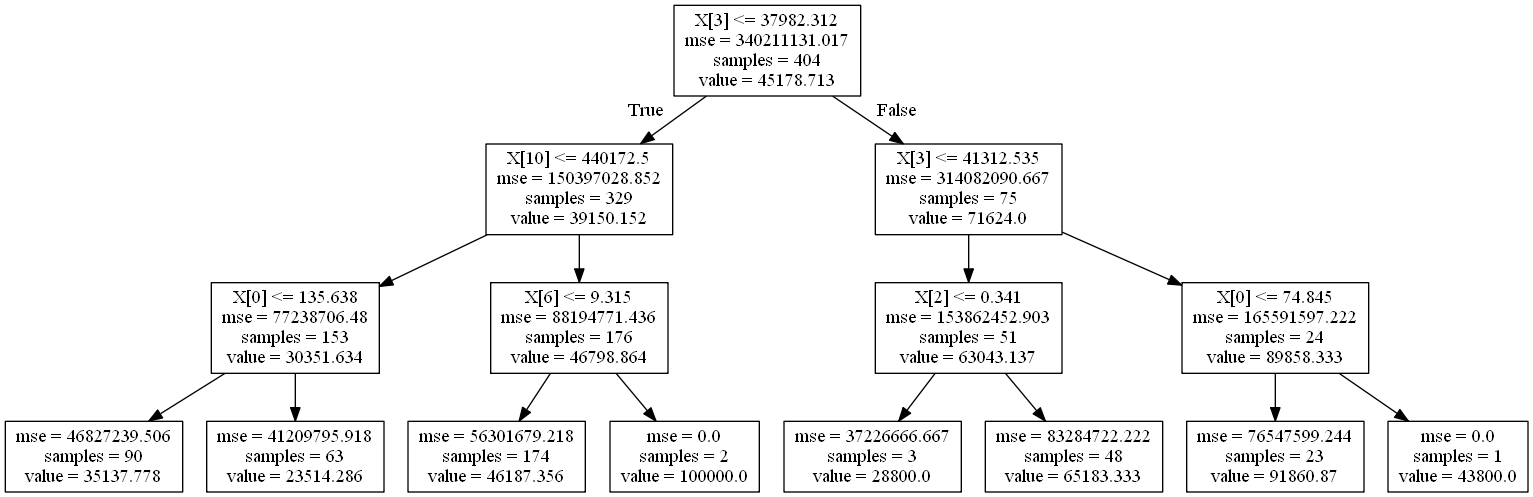

In [55]:
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### Controlling Tree Growth : Pruning

#### 1. Maximum Number of levels in Tree

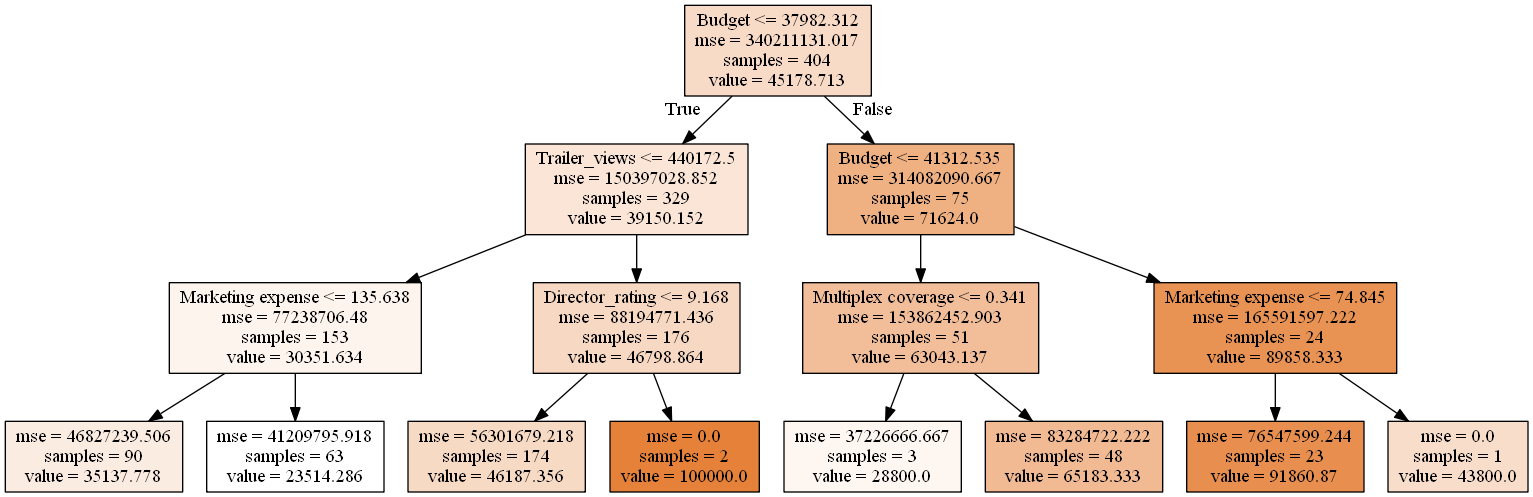

In [58]:
regtree1=tree.DecisionTreeRegressor(max_depth=3)
regtree1.fit(X_train,y_train)
dot_data=tree.export_graphviz(regtree1,out_file=None,feature_names=X_train.columns, filled=True)
graph1=pydotplus.graph_from_dot_data(dot_data)
Image(graph1.create_png())

#### 2. Minimum observations at internal node

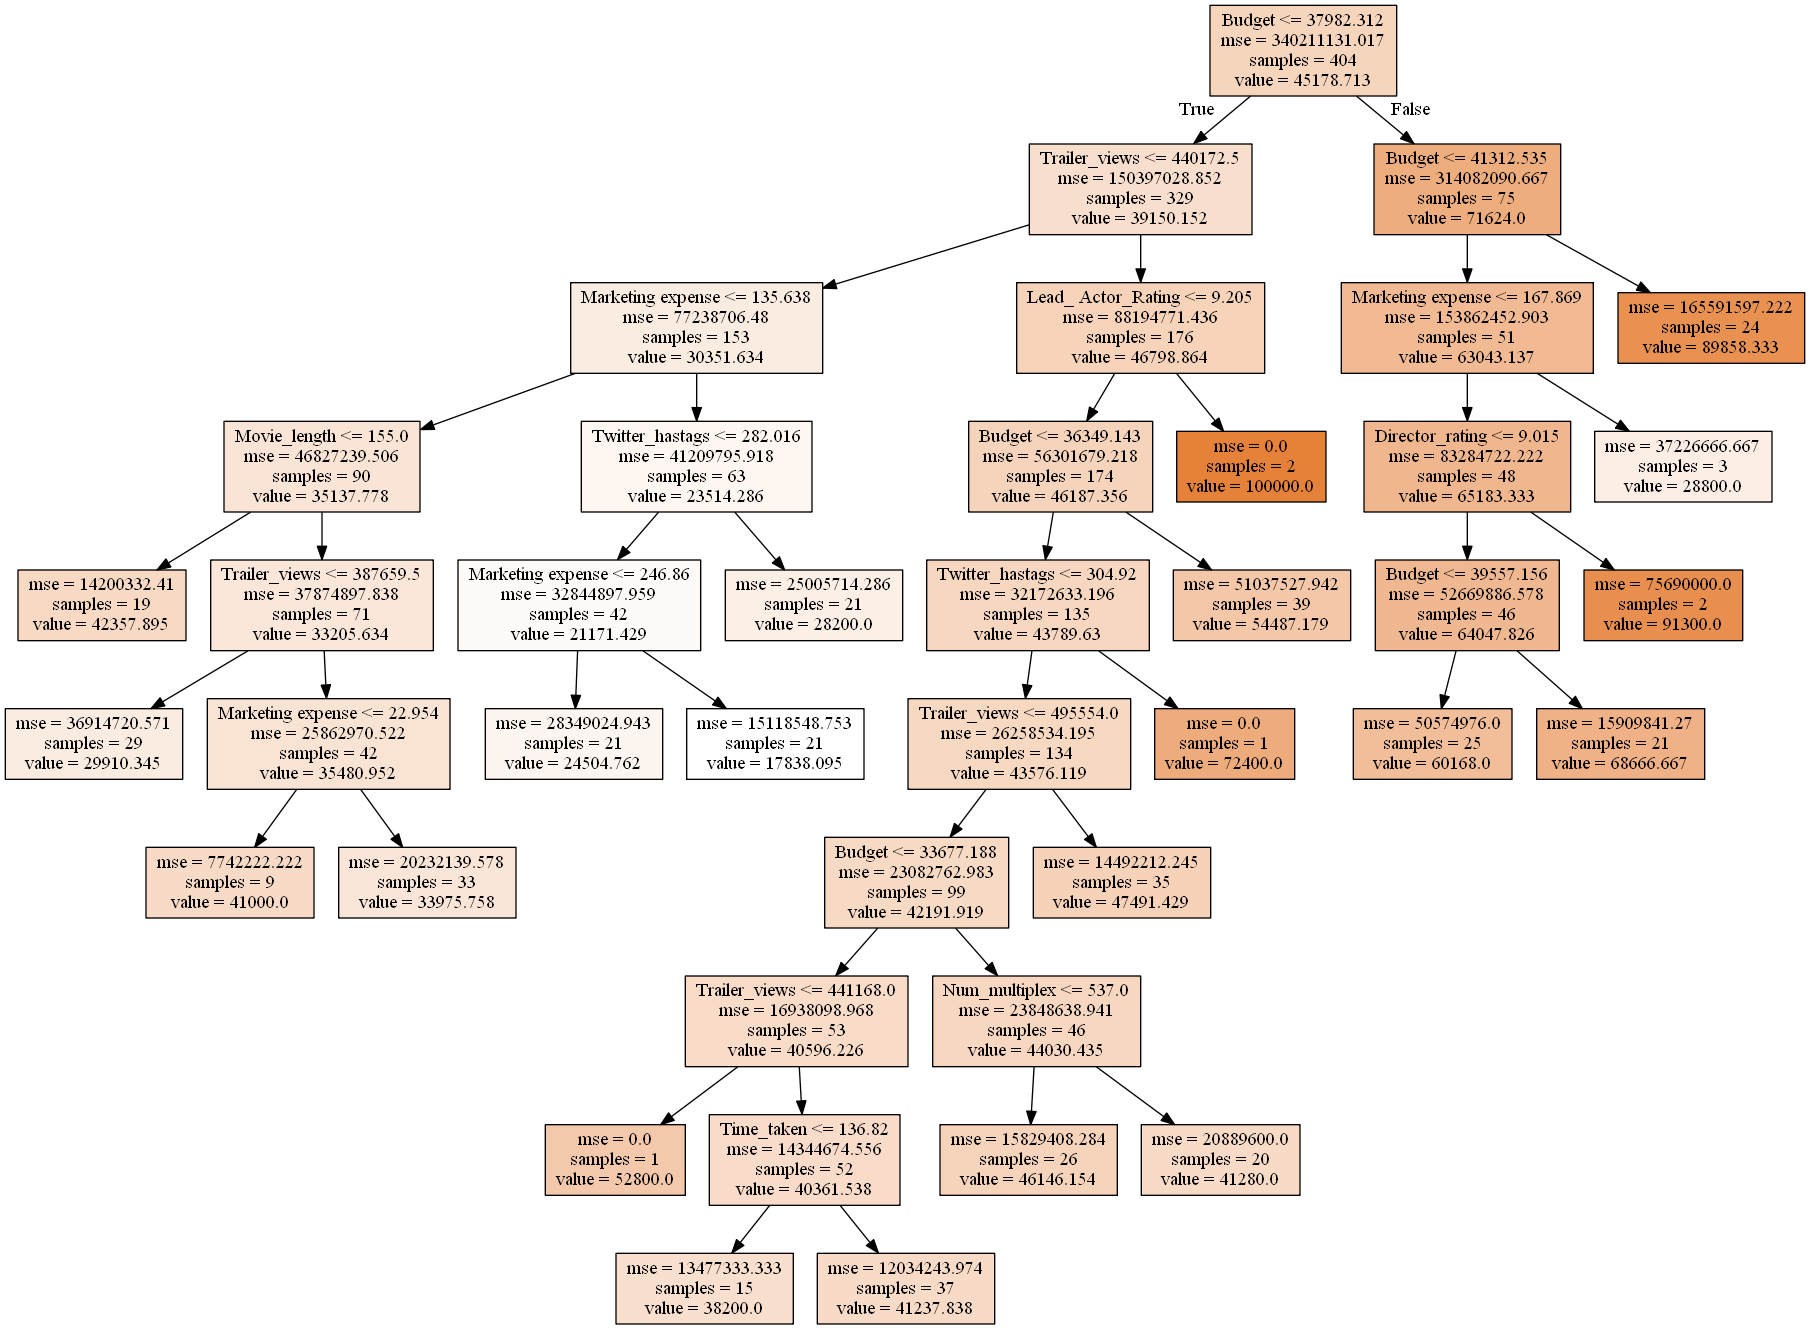

In [60]:
regtree2=tree.DecisionTreeRegressor(min_samples_split=40)
regtree2.fit(X_train,y_train)
dot_data=tree.export_graphviz(regtree2,out_file=None,feature_names=X_train.columns, filled=True)
graph2=pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

#### 3. Minimum observations at leaf node

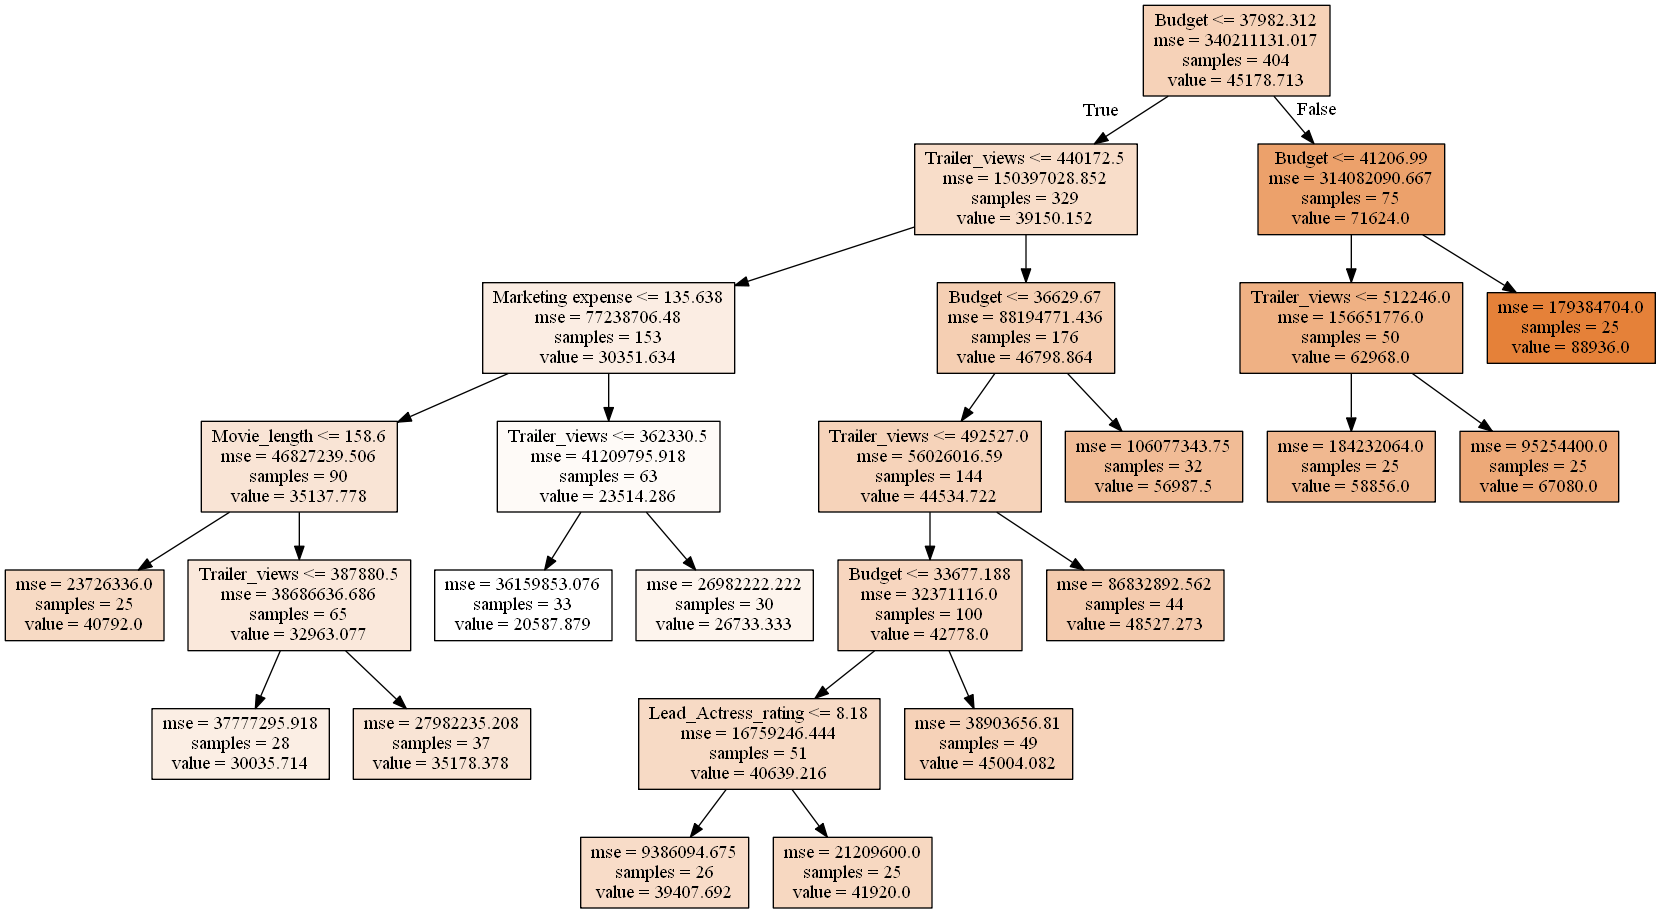

In [61]:
regtree3=tree.DecisionTreeRegressor(min_samples_leaf=25)
regtree3.fit(X_train,y_train)
dot_data=tree.export_graphviz(regtree3,out_file=None,feature_names=X_train.columns, filled=True)
graph3=pydotplus.graph_from_dot_data(dot_data)
Image(graph3.create_png())

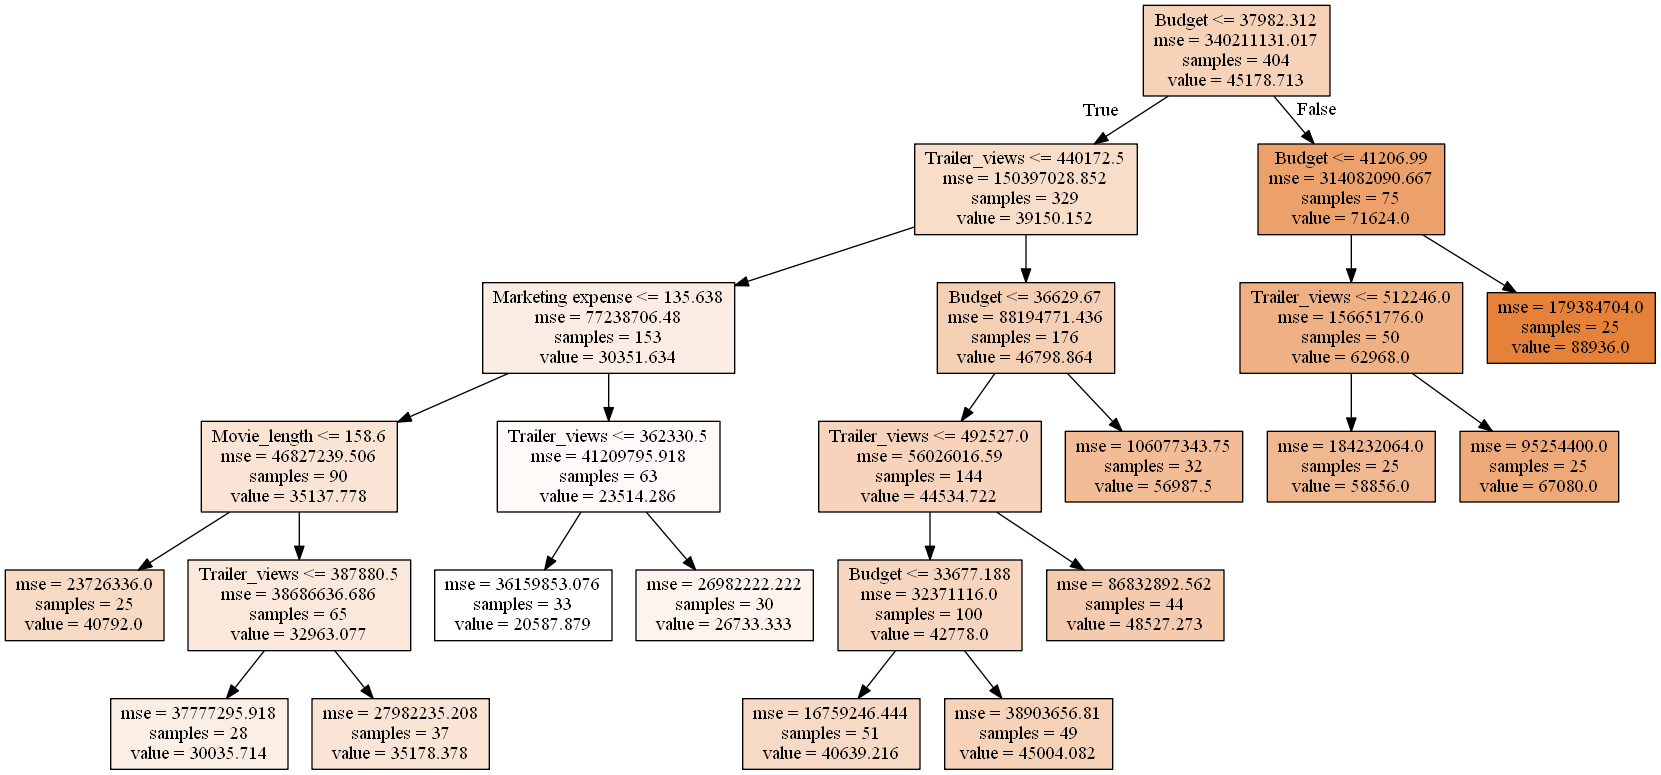

In [62]:
regtree4=tree.DecisionTreeRegressor(min_samples_leaf=25, max_depth=5)
regtree4.fit(X_train,y_train)
dot_data=tree.export_graphviz(regtree4,out_file=None,feature_names=X_train.columns, filled=True)
graph4=pydotplus.graph_from_dot_data(dot_data)
Image(graph4.create_png())